# 00. Table of contents

- Importing libraries and data 
- Preparing the df for clustering
- Applying the elbow technique
- k-means clustering

# 01. Importing libraries and data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # K-means clustering
import pylab as pl

In [21]:
# ensuring that the graphs created are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [22]:
#importing dataset
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 6\02_Data'
df= pd.read_csv(os.path.join(path, 'Prepared_Data', 'merged_cleaned_dataset_with_gdp.csv'))

# 02. Preparing data for clustering

In [23]:
df.shape

(2569, 21)

In [24]:
df.head()

,year,metabolite,SiteID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,population,Country Name,GDP per Capita(USD),GDP category
0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,...,35.45,40.03,37.48,38.57,47.070713,15.439504,487040.0,NaN,NaN,NaN
1,2021,cannabis,AT001,AT,Graz,54.77,80.42,60.10,53.88,50.46,...,233.51,122.90,60.37,87.17,47.070713,15.439504,487040.0,NaN,NaN,NaN
2,2021,cocaine,AT001,AT,Graz,127.60,121.48,137.75,174.94,179.55,...,111.91,120.33,152.39,138.65,47.070713,15.439504,487040.0,NaN,NaN,NaN
3,2021,MDMA,AT001,AT,Graz,5.82,4.53,5.27,16.56,17.37,...,7.83,6.06,12.33,9.64,47.070713,15.439504,487040.0,NaN,NaN,NaN
4,2021,methamphetamine,AT001,AT,Graz,12.44,11.24,14.99,9.33,18.66,...,15.66,13.11,13.08,13.09,47.070713,15.439504,487040.0,NaN,NaN,NaN


In [25]:
# removing categorical variables + population because in this column we have data for 2021 copied for each year
df.drop(['metabolite', 'SiteID', 'Country','City','Country Name','GDP category','population'], axis=1, inplace=True)

In [26]:
df.head()

,year,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,GDP per Capita(USD)
0,2021,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57,47.070713,15.439504,NaN
1,2021,54.77,80.42,60.10,53.88,50.46,77.04,233.51,122.90,60.37,87.17,47.070713,15.439504,NaN
2,2021,127.60,121.48,137.75,174.94,179.55,117.31,111.91,120.33,152.39,138.65,47.070713,15.439504,NaN
3,2021,5.82,4.53,5.27,16.56,17.37,10.14,7.83,6.06,12.33,9.64,47.070713,15.439504,NaN
4,2021,12.44,11.24,14.99,9.33,18.66,9.33,15.66,13.11,13.08,13.09,47.070713,15.439504,NaN


In [27]:
#removing rows with GDP per capita being NaN (in year 2021 this data is not yet available)
df.dropna(subset=['GDP per Capita(USD)'], inplace=True)

In [33]:
#removing columns of individual daily measurements as we want to decrease the number of variables
# and we are more interested in the average weekly measurements
df.drop(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], axis=1, inplace=True)

In [34]:
df.shape

(2225, 7)

In [35]:
#display NaN values
df.isnull().sum()

year                   0
Weekday mean           0
Weekend mean           0
Daily mean             0
latitude               0
longitude              0
GDP per Capita(USD)    0
dtype: int64

# 03. Applying the elbow method

In [36]:
#defining the range of clusters to be considered
num_cl = range(1,10)
# defining k-means clusters in the above range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [37]:
#creating score to store the score for each k-means cluster
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

[-795364933409.6088,
 -340997602657.41003,
 -65863994322.81234,
 -45244726222.27964,
 -31455440624.99288,
 -22924706818.477028,
 -17497633460.98396,
 -14045210745.259298,
 -11783002021.045826]

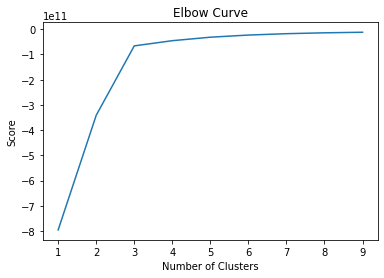

In [38]:
# plotting the elbow curve using pylab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The breaking point is at 3, the optimal number of clusters are 3

# 04. K-means clustering

In [41]:
# creating k-means model with 3 clusters
kmeans = KMeans(n_clusters=3)

In [42]:
# fitting the k-means model to the data
kmeans.fit(df)

KMeans(n_clusters=3)

In [44]:
#creating a new column in the dataframe to store the cluster labels
df['clusters'] = kmeans.fit_predict(df)

In [45]:
df.head()

,year,Weekday mean,Weekend mean,Daily mean,latitude,longitude,GDP per Capita(USD),clusters
5,2020,25.90,31.80,29.27,47.070713,15.439504,48588.65938,1
6,2020,49.26,51.77,50.69,47.070713,15.439504,48588.65938,1
7,2020,98.53,168.00,138.22,47.070713,15.439504,48588.65938,1
8,2020,7.90,18.81,14.14,47.070713,15.439504,48588.65938,1
9,2020,6.01,8.22,7.27,47.070713,15.439504,48588.65938,1


In [46]:
#checking how many observations are in each cluster
df.clusters.value_counts()

1    1265
0     727
2     233
Name: clusters, dtype: int64

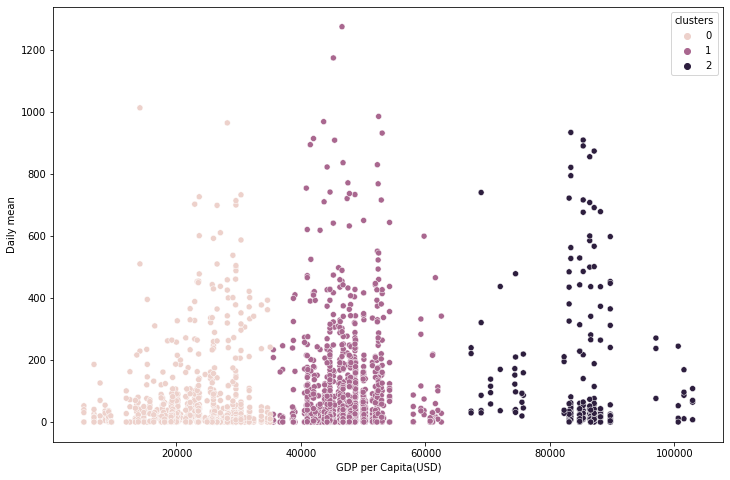

In [49]:
# Plot the clusters for the "Daily mean" and "GDP pe Caita" variables.
plt.figure(figsize=(12,8))
sns.scatterplot(x='GDP per Capita(USD)', y='Daily mean', hue='clusters', data=df)
plt.xlabel('GDP per Capita(USD)')
plt.ylabel('Daily mean')
plt.show()



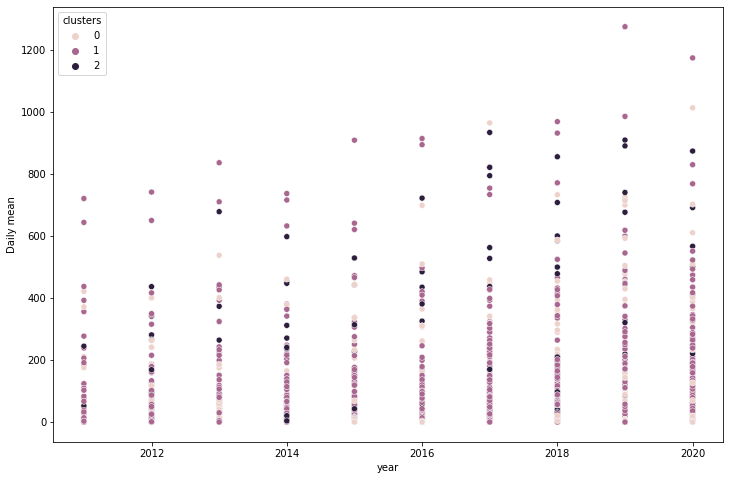

In [51]:
# Plot the clusters for the "Daily mean" and "year" variables.
plt.figure(figsize=(12,8))
sns.scatterplot(x='year', y='Daily mean', hue='clusters', data=df)
plt.xlabel('year')
plt.ylabel('Daily mean')
plt.show()


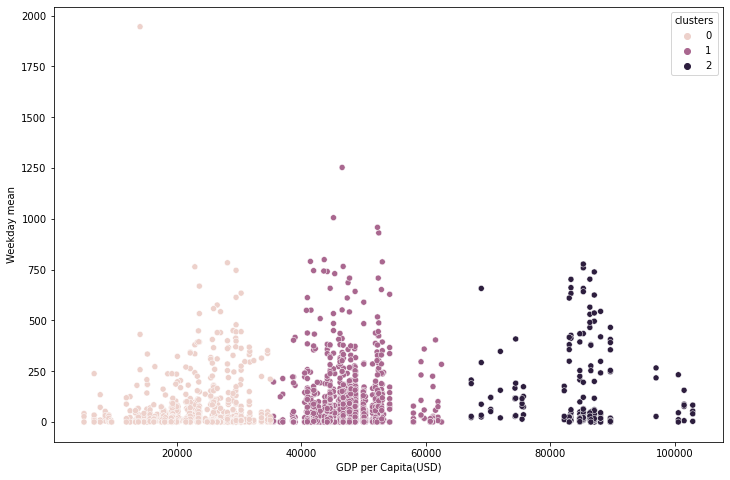

In [52]:
# Plot the clusters for the "Weekday mean" and "GDP per Capita" variables.
plt.figure(figsize=(12,8))
sns.scatterplot(x='GDP per Capita(USD)', y='Weekday mean', hue='clusters', data=df)
plt.xlabel('GDP per Capita(USD)')
plt.ylabel('Weekday mean')
plt.show()


In [53]:
#renaming cluster labeling
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [62]:
#creating descriptive stats for the clusters with the agg function with rounding to 2 decimal places
df.groupby('cluster').agg({'year':['mean', 'median'], 
                         'Weekday mean':['mean', 'median'], 
                         'Weekend mean':['mean', 'median'],
                          'Daily mean':['mean', 'median'],
                          'latitude':['mean', 'median'],
                          'longitude':['mean', 'median'],
                          'GDP per Capita(USD)':['mean', 'median']}).round(2)
                        

year         Weekday mean        Weekend mean         \
                mean  median         mean median         mean median   
cluster                                                                
dark purple  2016.12  2016.0       124.67  29.06       160.24  45.63   
pink         2016.82  2018.0        66.78  16.02        77.21  22.35   
purple       2016.79  2017.0        77.74  19.30        94.62  29.15   

            Daily mean        latitude        longitude         \
                  mean median     mean median      mean median   
cluster                                                          
dark purple     144.69  38.75    50.12  47.37      6.60   7.62   
pink             72.70  20.13    44.00  43.87      9.98  14.46   
purple           87.42  25.96    54.29  51.53     12.36  11.58   

            GDP per Capita(USD)            
                           mean    median  
cluster                                    
dark purple            85019.83  85334.52  
pink                   22919.85  23419.74  
purple                 47470.88  47973.61

The clusters make sense along GDP the most, in other aspects we dont fing meaningful patterns. The insight we got from clustering that lower GDP goes with lower drug usage and higher GDP goes with higher drug usage.

As next step, one could try to run some supervised ML algorithm within the clusters to see if a regression model (on drug usage vs. GDP) performs better than on the entire dataset.
Also we could try to visualize the clusters on a map and see if we get any additional insights that way.